**author**: jlefler@ucsd.edu<br>
**date**: 21 Aug 2016<br>
**language**: Python 2.7<br>
**license**: BSD3<br>

## map_samples_by_empo.ipynb

In [1]:
%matplotlib inline

In [2]:
#import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.cm as cmx
from matplotlib.colors import LinearSegmentedColormap
import empcolors

In [3]:
#read in metadata files and merge
meta_file = 'emp_qiime_mapping_release1.tsv'

#----------COLORS----------------
blue='#0343df'
light_blue='#95d0fc' 
orange='#f97306'
pink='#fa2a55'
teal='#029386'
brown='#d1b26f'

In [17]:
def mapping(input_file, output_file='map.pdf', grayscale='#eaebf3', outline_color='white', 
            size=(12.5,10), marker_size = 1.0, anti_alias = False, proj='merc'):

    '''Generates map of samples and their location based on their empo-categorization.
    Four maps are constructed for each of the major empo level-2 categories 
    (animal, plant, saline, non-saline)

    Parameters:
    -----------
    input_file: pd.DataFrame
        rows: samples
        columns: associated metadata
        ***samples MUST be categorized using empo-values (empo_1, empo_2, empo_3...)
    
    output_file: file
        name of output file

    grayscale: string
        String value representing a float between '.00' and '1.00'. Produces a shade of gray ranging
        from black (.00) to white (1.00). Defaults to 0.78.
    
    outline_color: str
        string indicating color of the outline of continents. String value is
        taken from list of accepted matplotlib values. Defaults to 'white'.
    
    size: tuple of ints
        size of figure 
    
    marker_size: float
        indicates thickness of plot points. Defaults to 1.0
    
    anti_alias: boolean
        indicates if plot points are anti-aliased. Defaults to False.

    '''
    
    #read in Mapping File. Remove Control samples
    meta_map = pd.read_table(input_file, index_col=0)
    meta_map = meta_map.loc[meta_map['empo_1']!='Control']
    
    #separate samples by empo_2 category
    an = meta_map.loc[meta_map['empo_2']=='Animal']
    pl = meta_map.loc[meta_map['empo_2']=='Plant']
    fr = meta_map.loc[meta_map['empo_2']=='Non-saline']
    sl = meta_map.loc[meta_map['empo_2']=='Saline']
    
    #construct figure
    fig = plt.figure(figsize=size)
    
    
#------------------------------------------------Animal---------------------------------------
    ax = fig.add_subplot(221)

    #construct map (continents: shade of gray) 
    m = Basemap(projection=proj, llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
    m.drawcoastlines(color = grayscale)
    m.drawcountries(color = outline_color)
    m.fillcontinents(color= grayscale, lake_color='none', zorder=0)

    #colors to be used for empo_3 labels (in order of usage)
    working_colors = [empcolors.get_empo_cat_color('Animal distal gut'), 
                      empcolors.get_empo_cat_color('Animal proximal gut'), 
                      empcolors.get_empo_cat_color('Animal surface'), 
                      empcolors.get_empo_cat_color('Animal secretion'), 
                      empcolors.get_empo_cat_color('Animal corpus'), 
                      brown]

    #empo = ordering of empo_3 labels...order will match with working_colors
    empo = empo_order('Animal', an)
    
    
    #list of legend objects objects
    handle = []
    
    #for each empo_3 label, plot its samples on map and generate color label for legend
    for i in range(len(empo)):
        #plot 
        sur = an.loc[an['empo_3'] == empo[i]]
        lon = sur['longitude_deg'].values
        lat = sur['latitude_deg'].values
        x,y = m(lon,lat)
        ax.plot(x,y,'o', markeredgecolor = working_colors[i], markeredgewidth = marker_size, fillstyle = 'none', antialiased = anti_alias)
        
        #create color label
        newlabel = empo[i].replace("Animal ", '').capitalize()
        a = mpatches.Patch(color = working_colors[i], label = newlabel)
        handle.append(a)

    #create legend using handle list
    plt.legend(handles=handle, loc='lower center', ncol=2, bbox_to_anchor=(.6,0), fontsize = 16)
    
    #graph title
    ax.text(x=.04, y=.25, s="Animal", fontsize = 20, transform=ax.transAxes)
    
    

#---------------------------------------------Plant---------------------------------------------
    ax = fig.add_subplot(222)
    
    m = Basemap(projection=proj, llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
    m.drawcoastlines(color = grayscale)
    m.drawcountries(color = outline_color)
    m.fillcontinents(color=grayscale, lake_color='none', zorder=0)

    working_colors = [empcolors.get_empo_cat_color('Plant surface'),
                      empcolors.get_empo_cat_color('Plant rhizosphere'),
                      empcolors.get_empo_cat_color('Plant corpus')]

    empo = empo_order('Plant', pl)
   
    handle = []
    
    for i in range(len(empo)):
      
        sur = pl.loc[pl['empo_3'] == empo[i]]
        lon = sur['longitude_deg'].values
        lat = sur['latitude_deg'].values
        x,y = m(lon,lat)
        ax.plot(x,y,'o', markeredgecolor = working_colors[i], markeredgewidth = marker_size, fillstyle = 'none', antialiased = anti_alias)
      
        newlabel = empo[i].replace("Plant ", '').capitalize()
        a = mpatches.Patch(color = working_colors[i], label = newlabel)
        handle.append(a)
    
    plt.legend(handles=handle, loc='lower center', ncol=2, bbox_to_anchor=(.6,0), fontsize = 16)
    
    ax.text(x=.04, y=.25, s="Plant", fontsize = 20, transform=ax.transAxes)
    
    
#----------------------------------------Saline---------------------------------------------
    ax = fig.add_subplot(223)
    
    m = Basemap(projection=proj, llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
    m.drawcoastlines(color = grayscale)
    m.drawcountries(color = outline_color)
    m.fillcontinents(color= grayscale, lake_color='none', zorder=0)

    working_colors = [empcolors.get_empo_cat_color('Water (saline)'), 
                      empcolors.get_empo_cat_color('Sediment (saline)'), 
                      empcolors.get_empo_cat_color('Surface (saline)'), 
                      empcolors.get_empo_cat_color('Hypersaline (saline)'), 
                      teal, 
                      brown]

    empo = empo_order('Saline', sl)
    
    handle = [] 
    
    for i in range(len(empo)):

        sur = sl.loc[sl['empo_3'] == empo[i]]
        lon = sur['longitude_deg'].values
        lat = sur['latitude_deg'].values
        x,y = m(lon,lat)
        ax.plot(x,y,'o', markeredgecolor = working_colors[i], markeredgewidth = marker_size, fillstyle = 'none', antialiased=anti_alias)

        newlabel = empo[i].replace(" (saline)", '').capitalize()
        a = mpatches.Patch(color = working_colors[i], label = newlabel)
        handle.append(a)
    
    plt.legend(handles=handle, loc='lower center', ncol=2,bbox_to_anchor=(.6,0), fontsize = 16)

    ax.text(x=.04, y=.25, s="Saline", fontsize = 20, transform=ax.transAxes)
    
    
#---------------------------------------Non-Saline----------------------------------------------
    ax = fig.add_subplot(224)

    m = Basemap(projection=proj, llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
    m.drawcoastlines(color = grayscale)
    m.drawcountries(color = outline_color)
    m.fillcontinents(color= grayscale, lake_color='none', zorder=0)

    working_colors = [empcolors.get_empo_cat_color('Water (non-saline)'), 
                      empcolors.get_empo_cat_color('Sediment (non-saline)'), 
                      empcolors.get_empo_cat_color('Surface (non-saline)'), 
                      empcolors.get_empo_cat_color('Soil (non-saline)'), 
                      empcolors.get_empo_cat_color('Aerosol (non-saline)'), 
                      brown]

    
    empo = empo_order('Non-Saline', fr)
    
    handle = [] 

    for i in range(len(empo)):
        
        sur = fr.loc[fr['empo_3'] == empo[i]]
        lon = sur['longitude_deg'].values
        lat = sur['latitude_deg'].values
        x,y = m(lon,lat)
        ax.plot(x,y,'o', markeredgecolor = working_colors[i], markeredgewidth = marker_size, fillstyle = 'none', antialiased = anti_alias)

        newlabel = empo[i].replace(" (non-saline)", '').capitalize()
        a = mpatches.Patch(color = working_colors[i], label = newlabel)
        handle.append(a)
    
    plt.legend(handles=handle, loc='lower center', ncol=2, bbox_to_anchor=(.6,0), fontsize = 16)

    ax.text(x=.019, y=.25, s="Non-Saline", fontsize = 20, transform=ax.transAxes)


    # USE EITHER OR
    plt.tight_layout(pad=0, h_pad=-1.4, w_pad=-0.1)
    #plt.subplots_adjust(wspace = 0, hspace=0)
    
    #Save fig as pdf specified in output_file 
    fig.savefig(output_file)

In [18]:
def empo_order(empo_2, db):
    ''' constructs an ordering of empo_3 categories that will match up with the desired order
    on the legend for each map. Code requires prior knowledge of the categorical empo values
    
    Parameters:
    -----------
    empo_2: string
    String indicating which set of empo_3 categorical values currently being dealt with 
    (Animal, Plant, Saline, Non-Saline). Taken from empo_2.
    
    db: pd.DataFrame
    A modified version of the original database read in to file. This version contains all samples
    that have the desired empo_2 categorical value (Animal, Plant, Saline, Non-saline)
    
    Returns:
    --------
    empo: list
    Desired ordering of empo_3 values 
    '''
    
    if empo_2 == 'Animal':
        empo = db.empo_3.unique() 
        empo = empo.tolist()
        empo = sorted(empo)
        a,b,c,d = empo.index('Animal corpus'), empo.index('Animal distal gut'), empo.index('Animal proximal gut'), empo.index('Animal surface')
        empo[a] = 'Animal distal gut'
        empo[b] = 'Animal proximal gut'
        empo[c] = 'Animal surface'
        empo[d] = 'Animal corpus'
        
    elif empo_2 == 'Plant':
        empo = db.empo_3.unique()
        empo = empo.tolist()
        empo = sorted(empo)
        a,b = empo.index('Plant corpus'), empo.index('Plant surface')
        empo[a] = 'Plant surface'
        empo[b] = 'Plant corpus'
    
    elif empo_2 == 'Saline':
        empo = db.empo_3.unique()
        empo = empo.tolist()
        empo[0] = 'Water (saline)'
        empo[1] = 'Sediment (saline)'
        empo[2] = 'Surface (saline)'
   
    elif empo_2 == 'Non-Saline':
        empo = db.empo_3.unique()
        empo = empo.tolist()
        empo[0] = 'Water (non-saline)'
        empo[1] = 'Sediment (non-saline)'
        empo[2] = 'Surface (non-saline)'
        empo[3] = 'Soil (non-saline)'
        
    return empo

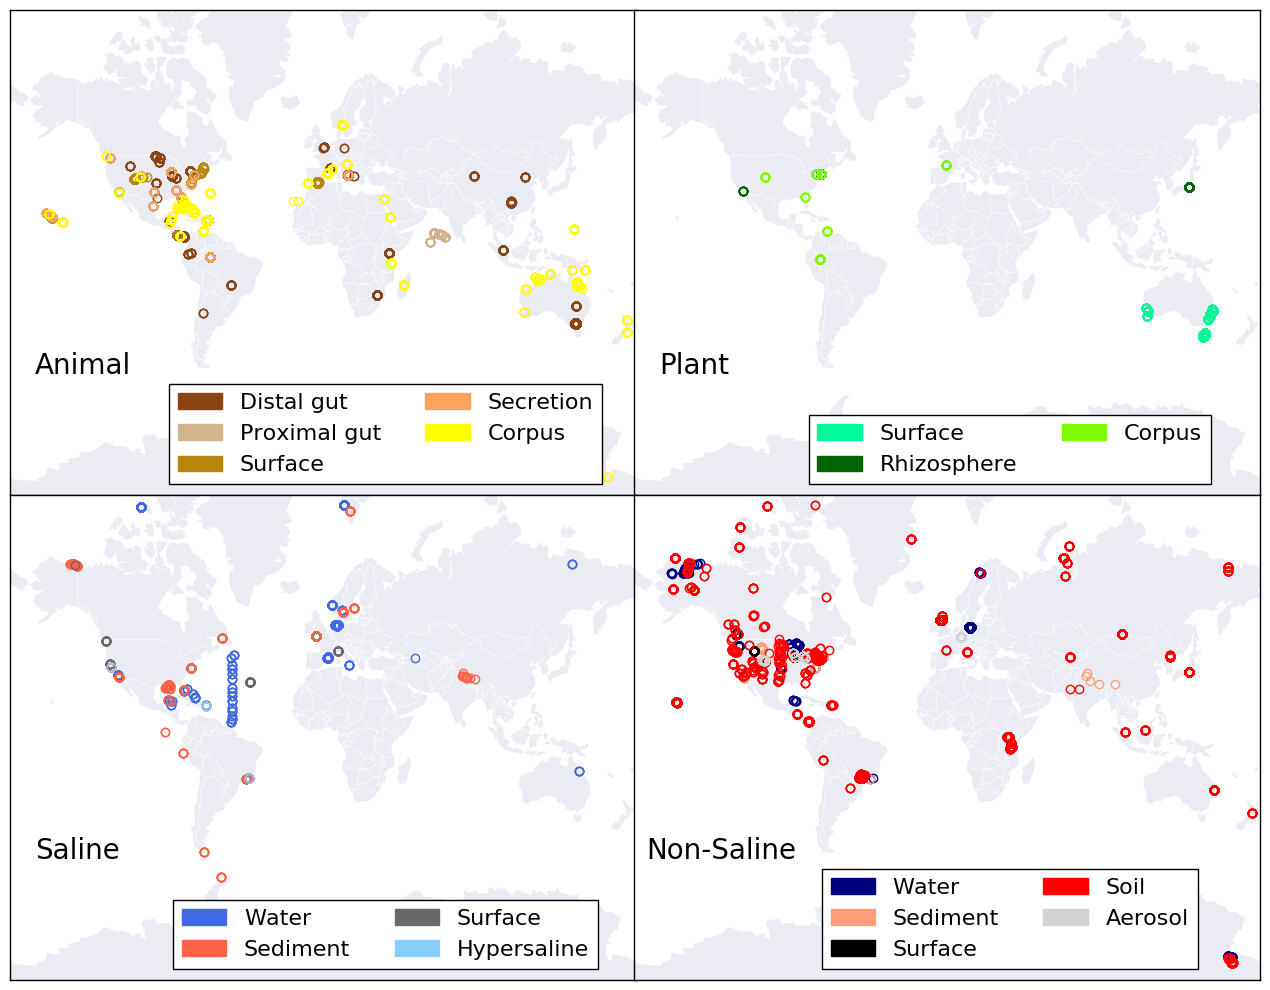

In [19]:
mapping(meta_file, 'map.pdf', anti_alias=True)